In [1]:
# importing the necessary libraries

import pandas as pd
import numpy as np
from sklearn import preprocessing
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib .pyplot as plt
%matplotlib inline

## Data acquistion

In [2]:
car_df = pd.read_csv("/Users/home/Desktop/PYTHON_SCRIPT/car.csv")


In [3]:
car_df.shape

(1728, 7)

In [4]:
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,Evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
car_df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'Evaluation'],
      dtype='object')

In [6]:
car_df.dtypes

buying        object
maint         object
doors         object
persons       object
lug_boot      object
safety        object
Evaluation    object
dtype: object

In [7]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying        1728 non-null object
maint         1728 non-null object
doors         1728 non-null object
persons       1728 non-null object
lug_boot      1728 non-null object
safety        1728 non-null object
Evaluation    1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
car_df.iloc[:,0:6].values

array([['vhigh', 'vhigh', '2', '2', 'small', 'low'],
       ['vhigh', 'vhigh', '2', '2', 'small', 'med'],
       ['vhigh', 'vhigh', '2', '2', 'small', 'high'],
       ...,
       ['low', 'low', '5more', 'more', 'big', 'low'],
       ['low', 'low', '5more', 'more', 'big', 'med'],
       ['low', 'low', '5more', 'more', 'big', 'high']], dtype=object)

### some data exploration

In [9]:
print('The shape of our features is:', car_df.shape)

The shape of our features is: (1728, 7)


In [10]:
# # Descriptive statistics for each column
car_df.describe()

,buying,maint,doors,persons,lug_boot,safety,Evaluation
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,5more,more,big,high,unacc
freq,432,432,432,576,576,576,1210


In [10]:
pd.isnull(car_df).sum()

buying        0
maint         0
doors         0
persons       0
lug_boot      0
safety        0
Evaluation    0
dtype: int64

In [11]:
y = car_df['Evaluation']
x = car_df.drop('Evaluation', axis = 1)

In [13]:
y.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [14]:
x.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [27]:
x = pd.get_dummies(x)
y = pd.factorize(y)[0]

In [33]:
y[1:5]


array([0, 0, 0, 0])

In [30]:
# Split the data into training and testing sets, Stratify  ensures that trg
# set looks similar to test set, making evalaution metrics more reliable
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 12345, stratify = y)

In [31]:
x_train.shape, y_train.shape

((1382, 21), (1382,))

In [21]:
# Feature Scaling  Presently we are not using it. 
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()  
#x_train = sc.fit_transform(x_train)  
#x_test = sc.transform(x_test)  

In [32]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)

In [34]:
dt_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
print(metrics.confusion_matrix(y_test, pred_dt)) 



[[239   1   0   2]
 [  8  68   0   1]
 [  0   1  12   0]
 [  0   1   0  13]]


In [24]:
print(metrics.classification_report(y_test, pred_dt)) 


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       242
           1       0.96      0.90      0.93        77
           2       1.00      0.92      0.96        13
           3       0.87      0.93      0.90        14

   micro avg       0.96      0.96      0.96       346
   macro avg       0.95      0.93      0.94       346
weighted avg       0.96      0.96      0.96       346



In [25]:
print(metrics.accuracy_score(y_test, pred_dt))

0.9624277456647399


In [26]:
from sklearn import tree
import collections

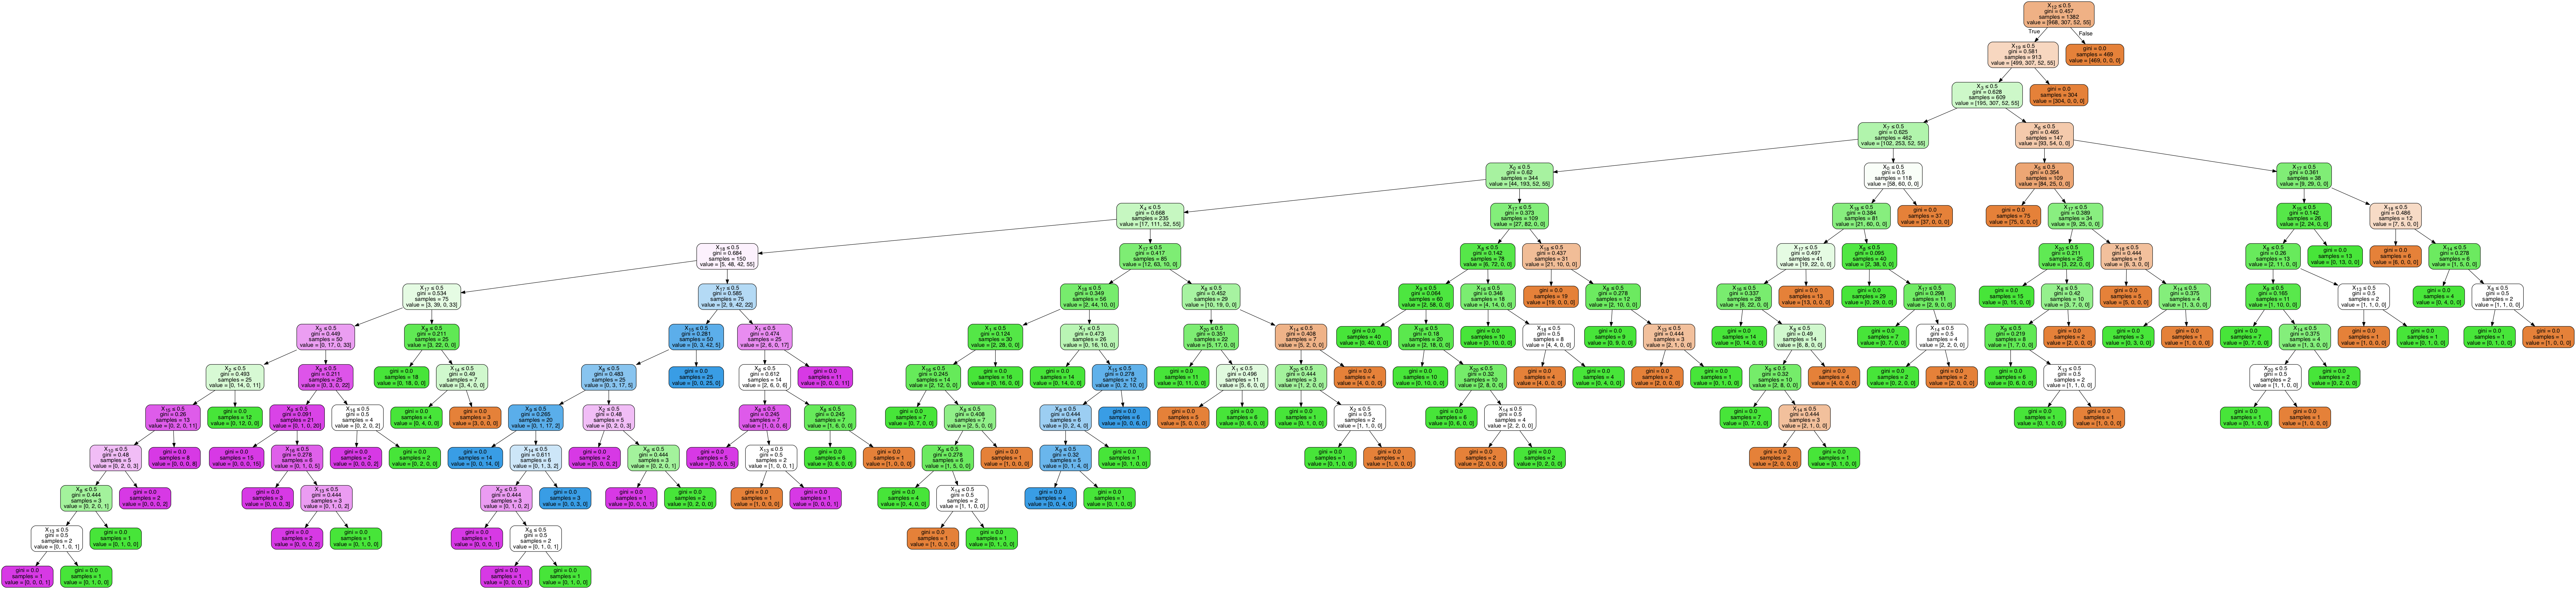

In [27]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

parameter selection ['http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html']

In [30]:
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', oob_score = True) 
Model_rf = rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)  
pred_rf[0:10]

array([0, 0, 1, 0, 0, 0, 1, 2, 0, 1])

In [29]:
# we can predict probabilities also
pred_rf_prob = rf.predict_proba(x_test) 
pred_rf_prob[0:10]

array([[0.99, 0.01, 0.  , 0.  ],
       [0.86, 0.14, 0.  , 0.  ],
       [0.1 , 0.83, 0.05, 0.02],
       [0.98, 0.02, 0.  , 0.  ],
       [0.82, 0.18, 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.12, 0.86, 0.02, 0.  ],
       [0.01, 0.21, 0.36, 0.42],
       [1.  , 0.  , 0.  , 0.  ],
       [0.1 , 0.74, 0.15, 0.01]])

In [31]:
print(metrics.confusion_matrix(y_test, pred_rf)) 

[[236   4   0   2]
 [  6  68   1   2]
 [  0   0  13   0]
 [  0   1   4   9]]


In [32]:
# Create confusion matrix
pd.crosstab(y_test, pred_rf, rownames=['Actual Class'], colnames=['Predicted Class'])

Predicted Class,0,1,2,3
Actual Class,,,,
0,236,4,0,2
1,6,68,1,2
2,0,0,13,0
3,0,1,4,9


In [ ]:
pd.DataFrame(metrics.confusion_matrix(y_test, pred_rf),
             columns = [0,1,2,3], index = [0,1,2,3])

In [33]:

accuracy = metrics.accuracy_score(y_test, pred_rf)
print(f'Out-of-bag score estimate: {Model_rf.oob_score_:.3}')
print(f'Mean Accuracy score: {accuracy: .3}')

Out-of-bag score estimate: 0.967
Mean Accuracy score:  0.942


In [ ]:
print(metrics.classification_report(y_test, pred_rf)) 

In [34]:
# View a list of the features and their importance scores
#list(zip(x_train.columns, Model_rf.feature_importances_))

feature_importances = pd.DataFrame(Model_rf.feature_importances_, index = x_train.columns, columns= ['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
persons_2,0.157213
safety_low,0.131072
safety_high,0.080695
maint_vhigh,0.055721
safety_med,0.055690
lug_boot_small,0.049979
buying_low,0.049373
buying_vhigh,0.047181
persons_4,0.040434
maint_low,0.039277
